# Telecom Churn Case Study : Dhara Khamar, Bunty Biswas, Gourav Kumar

## Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Objectives: 
The predictive model that you’re going to build will serve two purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

## Data Preparation:

1. Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

2. Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

After filtering the high-value customers, you should get about 29.9k rows.

3. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

## Step 1: Data Reading and understanding 

In [1]:
# Importing necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# lets import and read the dataset
tel_churn_data = pd.read_csv("telecom_churn_data.csv")
tel_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
tel_churn_data.shape

(99999, 226)

In [4]:
tel_churn_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
tel_churn_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


## Step 2: Data Preparation 

### Derive new features

In [6]:
# To calculate total amount of recharge for talktime and data, we can use following columns: av_rech_amt_data_* and total_rech_data_* , Where * means 6,7,8,9

tel_churn_data['total_data_rech_amt_6'] = tel_churn_data['av_rech_amt_data_6'] * tel_churn_data['total_rech_data_6']
tel_churn_data['total_data_rech_amt_7'] = tel_churn_data['av_rech_amt_data_7'] * tel_churn_data['total_rech_data_7']
tel_churn_data['total_data_rech_amt_8'] = tel_churn_data['av_rech_amt_data_8'] * tel_churn_data['total_rech_data_8']
tel_churn_data['total_data_rech_amt_9'] = tel_churn_data['av_rech_amt_data_9'] * tel_churn_data['total_rech_data_9']

In [7]:
# To Find Average recharge amount for good phase (6th June and 7th July months )

total_rech_amt_good_phase = (tel_churn_data['total_rech_amt_6'].fillna(0) + 
                             tel_churn_data['total_rech_amt_7'].fillna(0) + 
                             tel_churn_data['total_data_rech_amt_6'].fillna(0) + 
                             tel_churn_data['total_data_rech_amt_7'].fillna(0) ) / 2

In [8]:
# Dropping columns which are already been used for total amount  

tel_churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

### Filter high-value customers
High-value customers as follows: Those who have recharged with an amount more than or equal to X, 
where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [9]:
# TO find out 70 percentile of the calculated average amount

tel_churn_data_70 = np.percentile(total_rech_amt_good_phase, 70.0)
print(f'70 Percentile of recharge amount is : {tel_churn_data_70}')

70 Percentile of recharge amount is : 478.0


In [10]:
# Dataset with high value customers only

tel_churn_data_high_value = tel_churn_data[total_rech_amt_good_phase >= tel_churn_data_70]

In [11]:
tel_churn_data_high_value.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0


In [12]:
tel_churn_data_high_value.shape

(30001, 222)

### Tag churners and remove attributes of the churn phase

In [13]:
# Tagging churners

tel_churn_data_high_value['churn'] = np.where((tel_churn_data_high_value['total_ic_mou_9']==0) & 
                                              (tel_churn_data_high_value['total_og_mou_9']==0) & 
                                              (tel_churn_data_high_value['vol_2g_mb_9']==0) & 
                                              (tel_churn_data_high_value['vol_3g_mb_9']==0), 1, 0)

In [14]:
# List out all the columns for churn month(9) and remove them

columns_month_9 = [col for col in tel_churn_data_high_value.columns.to_list() if '_9' in col]
print(columns_month_9)

tel_churn_data_high_value = tel_churn_data_high_value.drop(columns_month_9, axis=1)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_data_rech_amt_9']


In [15]:
tel_churn_data_high_value.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,...,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,...,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,...,1.0,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,514.453,597.753,...,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,74.350,193.897,...,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,0


In [16]:
tel_churn_data_high_value.shape

(30001, 170)

In [17]:
# checking churn percentage

tel_churn_data_high_value['churn'].value_counts()/len(tel_churn_data_high_value)*100
#round(100*(tel_churn_data_high_value['churn'].mean()),2)

0    91.863605
1     8.136395
Name: churn, dtype: float64

## Step 3: Data Cleaning

### Missing values handling

In [18]:
# Checking for missing values
missing_values = round(tel_churn_data_high_value.isna().sum() / len(tel_churn_data_high_value) * 100, 2).sort_values(ascending=False)
missing_values

date_of_last_rech_data_8    46.83
count_rech_3g_8             46.83
count_rech_2g_8             46.83
arpu_3g_8                   46.83
total_data_rech_amt_8       46.83
                            ...  
vol_2g_mb_6                  0.00
vol_2g_mb_7                  0.00
vol_2g_mb_8                  0.00
vol_3g_mb_6                  0.00
churn                        0.00
Length: 170, dtype: float64

In [19]:
# removing columns with more than 40% missing values

# Select columns with more than 40% missing values
drop_cols = missing_values[missing_values > 40].index.tolist()
print(drop_cols)

# Drop columns > 40% missing
tel_churn_data_high_value.drop(drop_cols, axis=1, inplace=True)
tel_churn_data_high_value.shape

['date_of_last_rech_data_8', 'count_rech_3g_8', 'count_rech_2g_8', 'arpu_3g_8', 'total_data_rech_amt_8', 'arpu_2g_8', 'fb_user_8', 'max_rech_data_8', 'night_pck_user_8', 'date_of_last_rech_data_6', 'count_rech_3g_6', 'fb_user_6', 'total_data_rech_amt_6', 'max_rech_data_6', 'night_pck_user_6', 'arpu_2g_6', 'arpu_3g_6', 'count_rech_2g_6', 'arpu_3g_7', 'fb_user_7', 'date_of_last_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'night_pck_user_7', 'total_data_rech_amt_7', 'arpu_2g_7']


(30001, 143)

In [20]:
# Re-checking missing values
round(tel_churn_data_high_value.isna().sum() / len(tel_churn_data_high_value) * 100, 2).sort_values(ascending=False)

loc_ic_mou_8          3.91
og_others_8           3.91
loc_og_t2f_mou_8      3.91
loc_ic_t2t_mou_8      3.91
spl_og_mou_8          3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 143, dtype: float64

In [21]:
# Drop rows with missing values

for col in tel_churn_data_high_value.columns:
    tel_churn_data_high_value = tel_churn_data_high_value[~tel_churn_data_high_value[col].isna()]

In [22]:
tel_churn_data_high_value.shape

(28163, 143)

In [23]:
# Re-check missing values
round(tel_churn_data_high_value.isna().sum() / len(tel_churn_data_high_value) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_6        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
total_ic_mou_8      0.0
                   ... 
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
churn               0.0
Length: 143, dtype: float64

### Unique values handling

In [24]:
# lets check the unique value columns and drop them from dataset

for col in tel_churn_data_high_value.columns:
    if tel_churn_data_high_value[col].nunique() == 1:
        
        tel_churn_data_high_value.drop(col,axis=1,inplace = True)

tel_churn_data_high_value.shape

(28163, 130)

### Date columns handling

In [25]:
# lets check for columns that can be changed to integers, floats or date types
cols_types = tel_churn_data_high_value.select_dtypes(include=['object'])
print(cols_types.iloc[0])


date_of_last_rech_6    6/27/2014
date_of_last_rech_7    7/25/2014
date_of_last_rech_8    8/26/2014
Name: 7, dtype: object


In [26]:
cols_datetime = ["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"]

tel_churn_data_high_value.drop(cols_datetime, axis=1, inplace = True)
tel_churn_data_high_value.shape

(28163, 127)

## Step 4: Deriving new features

In [27]:
tel_churn_data = tel_churn_data_high_value.copy()

print(tel_churn_data.shape)

tel_churn_data.head()

(28163, 127)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,0,1,604,40.45,51.86,0.00,0.0,0
33,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0


### Lets derive some new features that will show us difference between good phase and action phase 

In [28]:
tel_churn_data['arpu_diff'] = tel_churn_data.arpu_8 - ((tel_churn_data.arpu_6 + tel_churn_data.arpu_7)/2)
tel_churn_data['total_og_mou_diff'] = tel_churn_data.total_og_mou_8 - ((tel_churn_data.total_og_mou_6 + tel_churn_data.total_og_mou_7)/2)
tel_churn_data['total_ic_mou_diff'] = tel_churn_data.total_ic_mou_8 - ((tel_churn_data.total_ic_mou_6 + tel_churn_data.total_ic_mou_7)/2)
tel_churn_data['total_rech_num_diff'] = tel_churn_data.total_rech_num_8 - ((tel_churn_data.total_rech_num_6 + tel_churn_data.total_rech_num_7)/2)
tel_churn_data['total_rech_amt_diff'] = tel_churn_data.total_rech_amt_8 - ((tel_churn_data.total_rech_amt_6 + tel_churn_data.total_rech_amt_7)/2)
tel_churn_data['vol_2g_mb_diff'] = tel_churn_data.vol_2g_mb_8 - ((tel_churn_data.vol_2g_mb_6 + tel_churn_data.vol_2g_mb_7)/2)
tel_churn_data['vol_3g_mb_diff'] = tel_churn_data.vol_3g_mb_8 - ((tel_churn_data.vol_3g_mb_6 + tel_churn_data.vol_3g_mb_7)/2)
tel_churn_data['vbc_3g_diff'] = tel_churn_data.aug_vbc_3g - ((tel_churn_data.jun_vbc_3g + tel_churn_data.jul_vbc_3g)/2)


In [29]:
# Lets drop all the columns which are used for deriving new features. 

drop_col_list = ["arpu_6", "arpu_7", "arpu_8" , "total_og_mou_8", "total_og_mou_7", "total_og_mou_6", 
                 "total_ic_mou_8", "total_ic_mou_7", "total_ic_mou_6", "total_rech_num_8", "total_rech_num_7", "total_rech_num_6",
                 "total_rech_amt_8", "total_rech_amt_7", "total_rech_amt_6",
                 "vol_2g_mb_8", "vol_2g_mb_7", "vol_2g_mb_6", "vol_3g_mb_8", "vol_3g_mb_7", "vol_3g_mb_6", 
                 "jun_vbc_3g", "jul_vbc_3g","aug_vbc_3g"]


tel_churn_data.drop(drop_col_list, axis=1, inplace=True)
tel_churn_data.shape

(28163, 111)

In [30]:
# Checking decrease in action phase compared to good phase

tel_churn_data['decrease_arpu'] = np.where(tel_churn_data['arpu_diff'] < 0 , 1, 0)
tel_churn_data['decrease_total_og_mou'] = np.where(tel_churn_data['total_og_mou_diff'] < 0 , 1, 0)
tel_churn_data['decrease_total_ic_mou'] = np.where(tel_churn_data['total_ic_mou_diff'] < 0 , 1, 0)
tel_churn_data['decrease_total_rech_num'] = np.where(tel_churn_data['total_rech_num_diff'] < 0 , 1, 0)
tel_churn_data['decrease_total_rech_amt'] = np.where(tel_churn_data['total_rech_amt_diff'] < 0 , 1, 0)
tel_churn_data['decrease_vol_2g_mb'] = np.where(tel_churn_data['vol_2g_mb_diff'] < 0 , 1, 0)
tel_churn_data['decrease_vol_3g_mb'] = np.where(tel_churn_data['vol_3g_mb_diff'] < 0 , 1, 0)
tel_churn_data['decrease_vbc_3g'] = np.where(tel_churn_data['vbc_3g_diff'] < 0 , 1, 0)

## Step 5: Exploratory data analysis (EDA) 

### Univariate and Bivariate Analysis

#### Churn rate vs Decrease in Average revenue per user

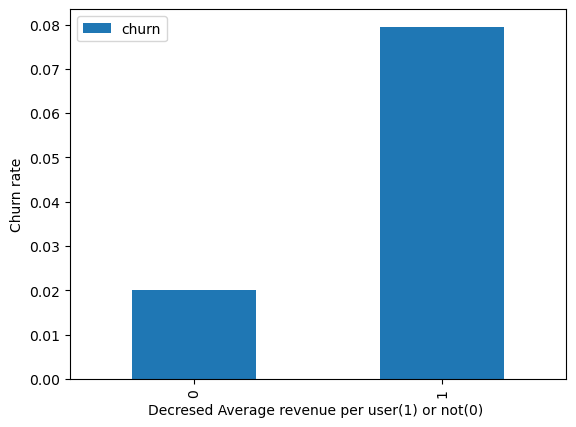

In [31]:
tel_churn_data.pivot_table(values='churn', index = "decrease_arpu", aggfunc='mean').plot.bar()
plt.xlabel("Decresed Average revenue per user(1) or not(0) ")
plt.ylabel("Churn rate")
plt.show()

* Insight: We can see that the churn rate is more for the customers, whose average revenue decreased in the action phase than the good phase.

#### Churn rate vs Decresed total outgoing minutes

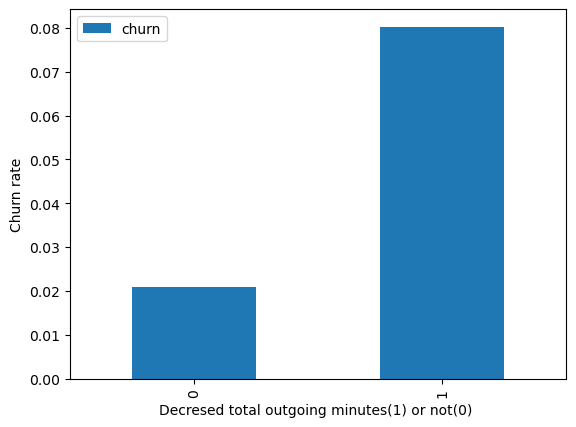

In [32]:
tel_churn_data.pivot_table(values='churn', index = "decrease_total_og_mou", aggfunc='mean').plot.bar()
plt.xlabel("Decresed total outgoing minutes(1) or not(0) ")
plt.ylabel("Churn rate")
plt.show()

* Insight :  we can see that churn rate is much more for the customers whose outgoing minutes are reduced in action phase.

#### Churn rate vs Decresed total incoming minutes

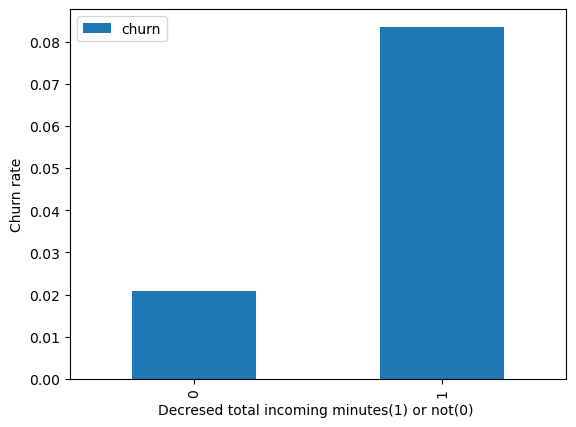

In [33]:
tel_churn_data.pivot_table(values='churn', index = "decrease_total_ic_mou", aggfunc='mean').plot.bar()
plt.xlabel("Decresed total incoming minutes(1) or not(0) ")
plt.ylabel("Churn rate")
plt.show()

* Insight: Same for the decreased incoming call minutes in action phase, churn rate is high.

#### Churn rate vs Decresed total number of recharge

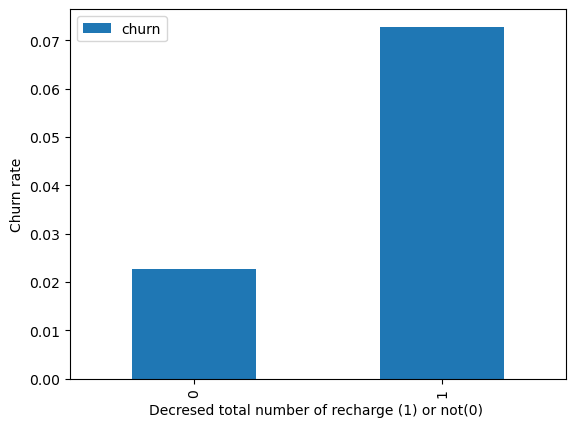

In [34]:
tel_churn_data.pivot_table(values='churn', index = "decrease_total_rech_num", aggfunc='mean').plot.bar()
plt.xlabel("Decresed total number of recharge (1) or not(0) ")
plt.ylabel("Churn rate")
plt.show()

* Insight: customers who have not rechared for more number of times has higher chances of churning.

#### Churn rate vs Decresed total recharge amount 

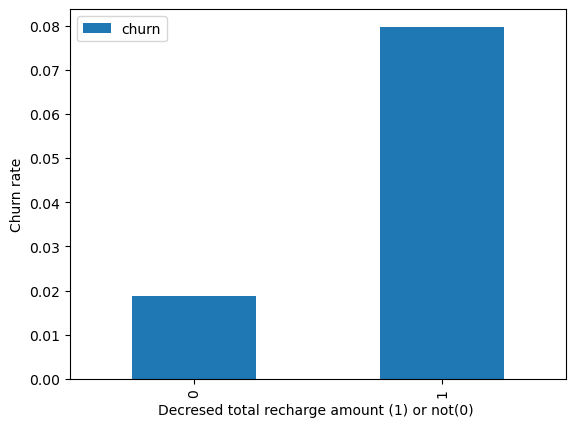

In [35]:
tel_churn_data.pivot_table(values='churn', index = "decrease_total_rech_amt", aggfunc='mean').plot.bar()
plt.xlabel("Decresed total recharge amount (1) or not(0) ")
plt.ylabel("Churn rate")
plt.show()

* Insight: As number of recharges are decreasing, recharge amount is also decreasing in action phase for churned customers.

#### Churn rate vs Decresed 2g data usage

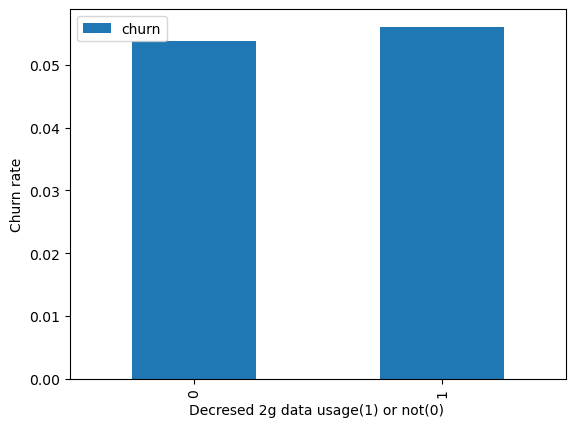

In [36]:
tel_churn_data.pivot_table(values='churn', index = "decrease_vol_2g_mb", aggfunc='mean').plot.bar()
plt.xlabel("Decresed 2g data usage(1) or not(0) ")
plt.ylabel("Churn rate")
plt.show()

#### Churn rate vs Decresed 3g data usage

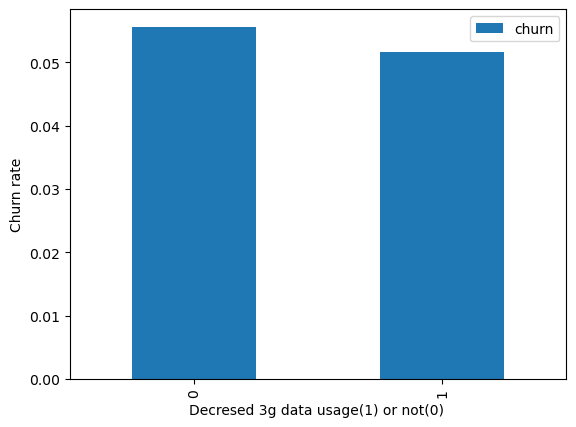

In [37]:
tel_churn_data.pivot_table(values='churn', index = "decrease_vol_3g_mb", aggfunc='mean').plot.bar()
plt.xlabel("Decresed 3g data usage(1) or not(0) ")
plt.ylabel("Churn rate")
plt.show()

* Insights: 2g and 3g data usage is not making any significant pattern for churners. 
    even if 2g and 3g data usage is decreased for customers, they are not churning.

#### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

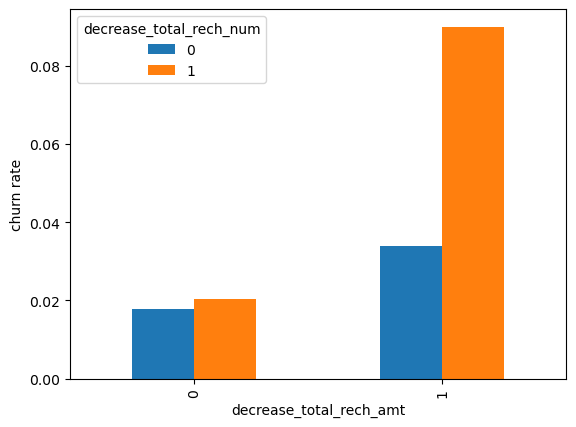

In [38]:
tel_churn_data.pivot_table(values='churn', index='decrease_total_rech_amt', columns='decrease_total_rech_num', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

* Insight: We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

#### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

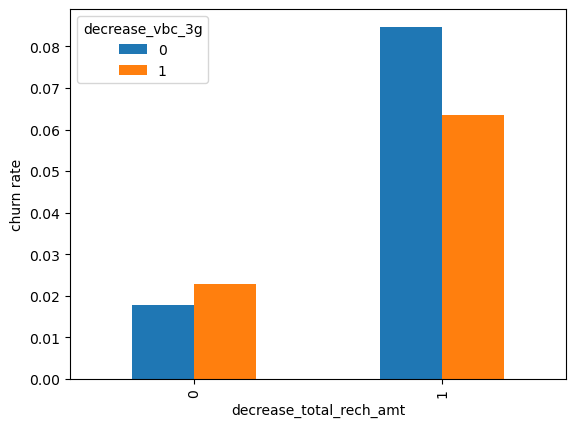

In [39]:
tel_churn_data.pivot_table(values='churn', index='decrease_total_rech_amt', columns='decrease_vbc_3g', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

* Insight: Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Age on networn vs Churn rate

Text(0, 0.5, 'Age on network')

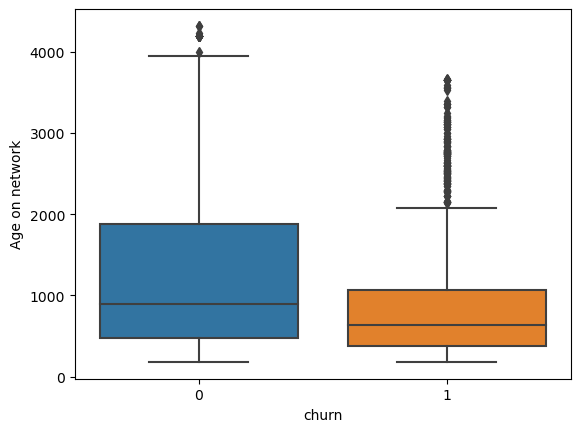

In [40]:
sns.boxplot(tel_churn_data["churn"], tel_churn_data["aon"])
plt.xlabel("churn")
plt.ylabel("Age on network")

* Insight: from the above plot we can say that age on network for the non churn customers is varying in large range compared to churners.
    Average age on network of churners is low. 

In [41]:
# Dropping derived columns

temp_derived_cols = ["decrease_arpu", "decrease_total_og_mou", "decrease_total_ic_mou", "decrease_total_rech_num",
               "decrease_total_rech_amt", "decrease_vol_2g_mb", "decrease_vol_3g_mb", "decrease_vbc_3g"]

tel_churn_data.drop(temp_derived_cols, axis=1, inplace = True)
tel_churn_data.shape

(28163, 111)

## Step 5: Traint-Test Split and Data Imbalance Handling with SMOTE  

### Train - Test Split

In [42]:
# Import library
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variables into X
X = tel_churn_data.drop(['mobile_number','churn'], axis=1)

# Putting target variable to y
y = tel_churn_data['churn']

# Splitting data into train and test set 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21122, 109), (7041, 109), (21122,), (7041,))

### Handling Class Imbalance

In [45]:
# checking for value counts of churn and non churn customers
tel_churn_data.churn.value_counts()

0    26625
1     1538
Name: churn, dtype: int64

In [46]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [47]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [48]:
#check churn and non churn customer ratio in dataset
y_train.value_counts()

0    19961
1    19961
Name: churn, dtype: int64

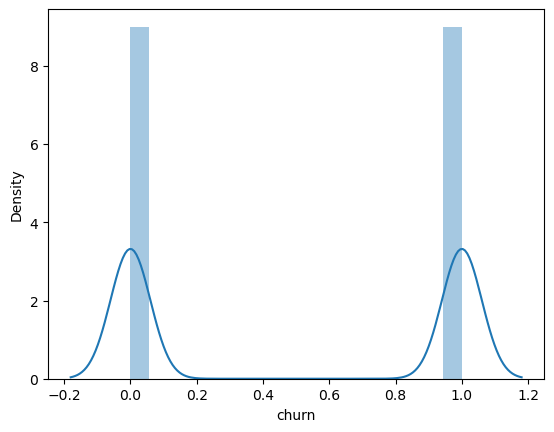

In [49]:
sns.distplot(y_train)
plt.show()

### Feature Scaling

In [50]:
# Standardization method
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()

In [51]:
# Fit the data into scaler and transform

# List of the numeric columns
cols_scale = X_train.columns.to_list()
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
X_train.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,aon,sep_vbc_3g,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,vbc_3g_diff
0,-0.009746,-0.269667,0.108574,0.547497,-0.258723,0.375700,-0.234418,-0.221689,-0.23340,-0.251859,...,-0.910135,-0.114808,0.097941,0.328885,0.166332,-0.037207,-0.296521,-0.062472,-0.640299,1.346321
1,-0.620615,-0.594087,-0.473786,-0.793264,-0.751042,-0.613961,-0.234418,-0.221689,-0.23340,-0.251859,...,-0.452309,-0.114808,0.201244,0.468651,0.317133,0.755323,0.243140,2.762853,-3.177971,2.169095
2,0.774096,1.166723,1.171035,-0.752194,-0.514224,-0.430916,-0.234418,-0.221689,-0.23340,-0.251859,...,-0.930841,-0.114808,0.221259,0.246458,-0.010849,-0.961825,0.125822,0.173549,0.089366,0.044325
3,-0.491284,-0.385788,-0.464453,-0.691908,-0.695496,-0.514256,-0.234418,-0.221689,-0.23340,-0.251859,...,-0.391343,-0.114808,0.284178,0.331402,-2.319056,-0.103251,0.197386,-0.730566,0.449393,0.475098
4,-0.045324,0.005862,0.321393,-0.019405,0.244954,0.309728,-0.234418,-0.221689,-0.22169,-0.251859,...,-0.357983,-0.114808,0.376087,0.292947,0.272930,1.878074,0.528222,0.173549,0.089366,0.044325


## Step 7: Modeling with PCA 

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [54]:
pca.components_

array([[-3.73534066e-02, -2.06438234e-02,  3.31006469e-02, ...,
         2.25038493e-02,  1.70786071e-02,  1.21039692e-02],
       [ 2.21834615e-01,  2.39715112e-01,  1.93678741e-01, ...,
         3.79719608e-02,  1.36772366e-02,  9.08802818e-03],
       [-9.06848845e-02, -5.31790691e-02,  2.59695070e-02, ...,
         2.53317754e-02,  1.86194408e-02,  1.33908646e-02],
       ...,
       [-5.60060348e-06, -3.65596932e-06,  2.93638117e-06, ...,
         2.48798778e-08, -2.03128243e-07,  1.63835185e-07],
       [-8.04504689e-06, -5.00034005e-06,  2.89267470e-06, ...,
        -4.43318928e-08, -7.68350843e-09, -6.54544808e-08],
       [-6.34129708e-06, -1.52572084e-07,  2.29739456e-06, ...,
        -5.92251553e-08,  1.69957707e-08,  1.58062078e-08]])

In [55]:
pca.explained_variance_ratio_

array([9.94739352e-02, 6.81891402e-02, 5.11205665e-02, 4.48908689e-02,
       4.29215639e-02, 3.95736566e-02, 3.09805031e-02, 2.76483259e-02,
       2.71196152e-02, 2.56225417e-02, 2.46630809e-02, 2.34825672e-02,
       2.26277829e-02, 2.13578496e-02, 2.07053134e-02, 1.81097973e-02,
       1.75742601e-02, 1.68232555e-02, 1.60278772e-02, 1.55616769e-02,
       1.50975690e-02, 1.42117457e-02, 1.39347227e-02, 1.31141389e-02,
       1.24419136e-02, 1.14144147e-02, 1.05517478e-02, 1.03414665e-02,
       9.66714437e-03, 9.19111805e-03, 8.83187749e-03, 8.66995382e-03,
       8.61956215e-03, 8.27714477e-03, 7.93405825e-03, 7.79571150e-03,
       7.51210413e-03, 7.46018502e-03, 7.11089319e-03, 6.93067465e-03,
       6.70344159e-03, 6.49780348e-03, 6.30286757e-03, 5.52025902e-03,
       5.25657189e-03, 5.15267111e-03, 5.01337197e-03, 4.47458857e-03,
       4.46597449e-03, 4.25430340e-03, 4.10839344e-03, 3.97393076e-03,
       3.88981182e-03, 3.76467766e-03, 3.66725880e-03, 3.51177152e-03,
      

In [56]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

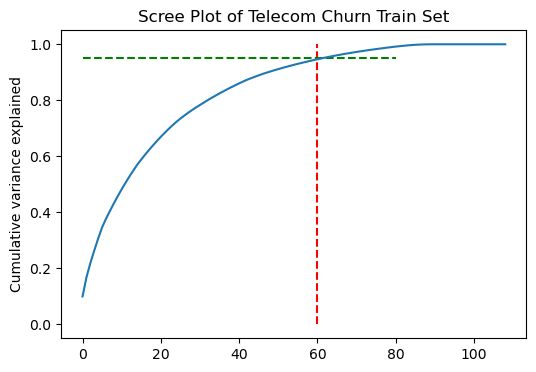

In [57]:
# Scree plot - Cumulative variance explained chart 

fig = plt.figure(figsize=[6,4])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.title('Scree Plot of Telecom Churn Train Set');

plt.show()

* Observations: We can see that 60 components explain allmost more than 95% variance of the data. So, we will perform PCA with 60 components.

In [58]:
# Perform PCA using the first 60 components
pca_final = PCA(n_components=60, random_state=42)
transformed_data = pca_final.fit_transform(X_train)

X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,61)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,churn
0,5.562945,0.025009,-1.817543,0.352115,-0.019565,-0.329618,-0.400697,-0.564006,0.322960,-0.287160,...,1.157649,-1.386220,-0.104204,0.510008,-0.931017,0.320710,-0.018634,-0.555241,-0.240922,0
1,-1.020296,-3.798071,0.886219,-0.877737,0.555564,0.486862,0.735748,-0.143640,0.259652,-1.706658,...,1.417105,-2.078513,-0.581079,-0.405597,0.053169,0.504756,-0.976185,0.221791,-1.209203,0
2,-2.455389,1.308699,-0.336619,-2.329287,0.901505,-1.045315,0.687706,-0.028991,-0.321063,-0.872025,...,-0.019214,-0.266087,-0.303844,0.228924,-0.013352,-0.128650,-0.094374,-0.049200,-0.276429,0
3,7.530192,-0.064945,-0.734742,3.000664,6.835211,-2.842481,-0.481627,-0.674703,-6.888659,0.698405,...,0.471818,0.800133,-0.458951,1.271357,0.014627,0.766689,0.067106,0.852361,-1.711186,0
4,0.943246,1.022201,1.755384,0.075399,2.186740,0.650333,-1.100527,-0.588111,2.189102,1.095197,...,0.016644,0.328417,-0.348440,0.044954,0.064974,-0.071841,0.010063,0.577872,0.751355,0


## Step 8: Evaluating Different Models with PCA 

### PCA + Logistic regression

In [59]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [60]:
# Function for  Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity  :', sensitivity)
    
    specificity = round(TN/float(TN + FP),3)
    print('Specificity :', specificity)
    
    #precision = round(TP/float(TP + FP),3)
    #print('Precision / Positive Predictive Value :', precision)
    #print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [61]:
# X,y Split
y_train_pca = data_train_pca.pop('churn')
X_train_pca = data_train_pca

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [62]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([0, 0, 1, 0, 0])

In [63]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)

y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([0, 0, 0, 0, 0])

In [64]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.841
Sensitivity  : 0.873
Specificity : 0.81

Test Performance :

Accuracy : 0.883
Sensitivity  : 0.536
Specificity : 0.903


### Hyperparameter Tuning

In [65]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold

params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

lr_search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
lr_search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [66]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', lr_search.best_score_)
print('Best Parameters :', lr_search.best_params_)

Best ROC-AUC score : 0.9129171328415968
Best Parameters : {'C': 10, 'penalty': 'l2'}


In [67]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = lr_search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([0, 0, 1, 0, 0])

In [68]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([0, 0, 0, 0, 0])

In [69]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train_pca, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.841
Sensitivity  : 0.873
Specificity : 0.809

Test Performance :

Accuracy : 0.883
Sensitivity  : 0.536
Specificity : 0.903


### PCA + Decision Tree

In [70]:
X_train_pca.shape, y_train_pca.shape, X_test_pca.shape, y_test.shape

((39922, 60), (39922,), (7041, 60), (7041,))

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [73]:
dt_base.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [74]:
y_train_pred = dt_base.predict(X_train_pca)
y_test_pred = dt_base.predict(X_test_pca)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6664
           1       0.31      0.29      0.30       377

    accuracy                           0.93      7041
   macro avg       0.63      0.63      0.63      7041
weighted avg       0.93      0.93      0.93      7041



#### Plot the ROC curve

In [77]:
from sklearn.metrics import plot_roc_curve

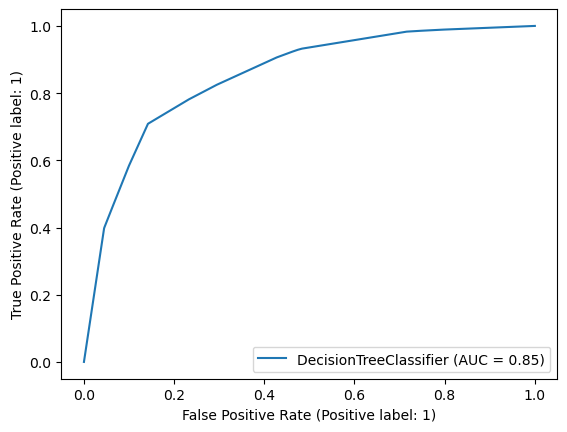

In [78]:
plot_roc_curve(dt_base, X_train_pca, y_train_pca, drop_intermediate=False)
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
dt = DecisionTreeClassifier(random_state=42)

In [81]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [82]:
dt_grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [83]:
%%time
dt_grid_search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 34.9 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [84]:
dt_grid_search.best_score_

0.8785132257300896

In [85]:
pca_dt_best = dt_grid_search.best_estimator_
pca_dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [86]:
# Modelling using the best PCA-Decision tree Estimator 
pca_dt_best_fit = pca_dt_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_pca_dt_best = pca_dt_best_fit.predict(X_train_pca)
y_train_pred_pca_dt_best[:5]

array([0, 0, 0, 0, 0])

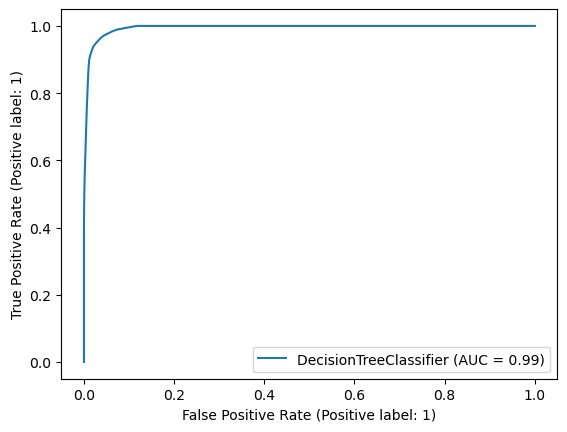

In [87]:
plot_roc_curve(pca_dt_best, X_train_pca, y_train_pca)
plt.show()

In [88]:
# Prediction on test set
y_test_pred_pca_dt_best = pca_dt_best_fit.predict(X_test_pca)
y_test_pred_pca_dt_best[:5]

array([1, 0, 0, 1, 1])

In [89]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train_pca, y_train_pred_pca_dt_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_dt_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.964
Sensitivity  : 0.966
Specificity : 0.961

Test Performance :

Accuracy : 0.595
Sensitivity  : 0.371
Specificity : 0.608


### PCA + Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [92]:
%%time
rf.fit(X_train_pca, y_train_pca)

Wall time: 664 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [93]:
rf.oob_score_

0.7538449977456039

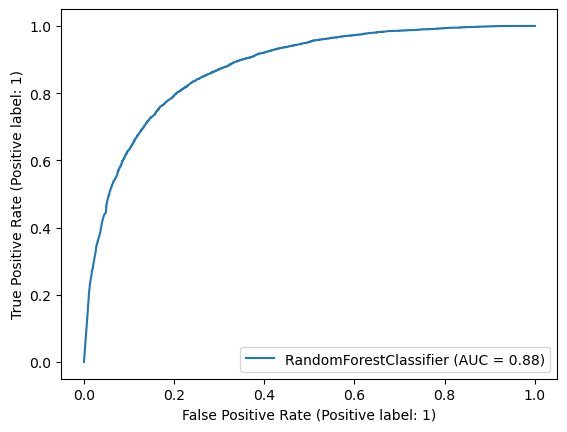

In [94]:
plot_roc_curve(rf, X_train_pca, y_train_pca)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [95]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [96]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [10,20,50,100,200],
    'n_estimators': [25, 50, 60,70]
}

In [97]:
rf_grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [98]:
%%time
rf_grid_search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 7min 28s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [10, 20, 50, 100, 200],
                         'n_estimators': [25, 50, 60, 70]},
             scoring='accuracy', verbose=1)

In [99]:
rf_grid_search.best_score_

0.9291371366116663

In [100]:
pca_rf_best = rf_grid_search.best_estimator_
pca_rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=70,
                       n_jobs=-1, random_state=42)

In [101]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

array([0, 0, 0, 0, 0])

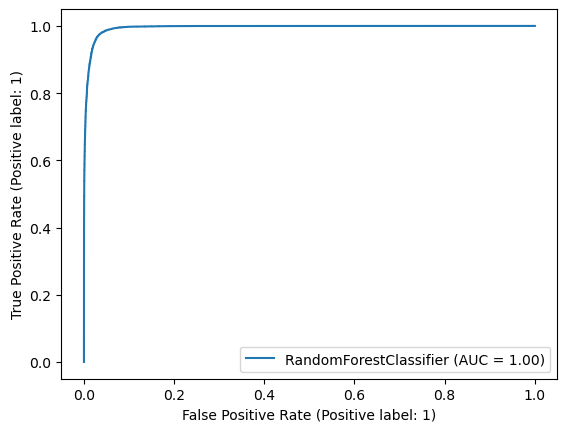

In [102]:
plot_roc_curve(pca_rf_best, X_train_pca, y_train_pca)
plt.show()

In [103]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

array([0, 0, 0, 0, 0])

In [104]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train_pca, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.97
Sensitivity  : 0.982
Specificity : 0.958

Test Performance :

Accuracy : 0.945
Sensitivity  : 0.069
Specificity : 0.995


In [105]:
pca_rf_best.feature_importances_

array([0.15589947, 0.01722474, 0.02596978, 0.06775368, 0.02175643,
       0.06092054, 0.01450628, 0.00924092, 0.01142614, 0.03563719,
       0.01014448, 0.01185176, 0.0170879 , 0.01531132, 0.03486845,
       0.021482  , 0.02092875, 0.02340406, 0.02105208, 0.00873821,
       0.01365459, 0.01489778, 0.01956786, 0.0097026 , 0.01808541,
       0.00875645, 0.0141366 , 0.00689058, 0.01278233, 0.00763096,
       0.01092377, 0.00760996, 0.03155734, 0.00789755, 0.00717974,
       0.01577243, 0.01000354, 0.00796146, 0.00752077, 0.00689208,
       0.00552822, 0.00593493, 0.00627054, 0.00678064, 0.00660681,
       0.00753415, 0.00734476, 0.00622499, 0.00771986, 0.01516882,
       0.00699159, 0.00860769, 0.00747075, 0.01087372, 0.00899847,
       0.00600215, 0.0061512 , 0.00895024, 0.00692271, 0.00928975])

In [106]:
imp_df = pd.DataFrame({
    "Varname": X_train_pca.columns,
    "Imp": pca_rf_best.feature_importances_
})

In [107]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,PC_1,0.155899
3,PC_4,0.067754
5,PC_6,0.060921
9,PC_10,0.035637
14,PC_15,0.034868
32,PC_33,0.031557
2,PC_3,0.025970
17,PC_18,0.023404
4,PC_5,0.021756
15,PC_16,0.021482


### PCA + Adaboost

In [108]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [109]:
#Decision Stumps -> Decision Tree with 1 depth

In [110]:
abc=AdaBoostClassifier(n_estimators=10,random_state=10)
model1=abc.fit(X_train_pca,y_train_pca)

In [111]:
y_train_ada_pred=model1.predict(X_train_pca)
y_test_ada_pred=model1.predict(X_test_pca)

In [112]:
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Train Accuracy:", accuracy_score(y_train_pca, y_train_ada_pred))
print("AdaBoost Classifier Model Test Accuracy:", accuracy_score(y_test, y_test_ada_pred))

AdaBoost Classifier Model Train Accuracy: 0.7889384299383798
AdaBoost Classifier Model Test Accuracy: 0.9375088765800312


### Hyper-parameter tuning for Adaboost

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
model = AdaBoostClassifier()

# define the grid of values to search
ada_grid = dict()
ada_grid['n_estimators'] = [20,30,50,60,70]
ada_grid['learning_rate'] = [0.001, 0.01, 0.1, 1.0]
ada_grid

{'n_estimators': [20, 30, 50, 60, 70],
 'learning_rate': [0.001, 0.01, 0.1, 1.0]}

In [115]:
# define the grid search procedure
ada_grid_search = GridSearchCV(estimator=model, param_grid=ada_grid, n_jobs=-1, cv=5, \
                          scoring='accuracy')

#execute the grid search
ada_grid_result = ada_grid_search.fit(X_train_pca, y_train_pca)

In [116]:
ada_grid_search.best_score_

0.8341770140155076

In [117]:
pca_ada_best = ada_grid_search.best_estimator_
pca_ada_best

AdaBoostClassifier(n_estimators=70)

In [118]:
# Modelling using the best PCA-RandomForest Estimator 
pca_ada_best_fit = pca_ada_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_pca_ada_best = pca_ada_best_fit.predict(X_train_pca)
y_train_pred_pca_ada_best[:5]

array([0, 0, 1, 0, 0])

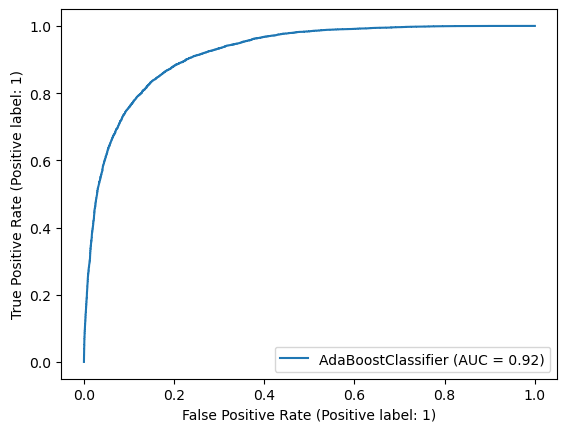

In [119]:
plot_roc_curve(pca_ada_best, X_train_pca, y_train_pca)
plt.show()

In [120]:
# Prediction on test set
y_test_pred_pca_ada_best = pca_ada_best_fit.predict(X_test_pca)
y_test_pred_pca_ada_best[:5]

array([0, 0, 0, 1, 0])

In [121]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train_pca, y_train_pred_pca_ada_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_ada_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.842
Sensitivity  : 0.859
Specificity : 0.825

Test Performance :

Accuracy : 0.776
Sensitivity  : 0.369
Specificity : 0.799


## Step 9: Modeling without PCA (Logistic Regression)

In [122]:
print("X train: ", X_train.shape, "y train: ", y_train.shape)

X train:  (39922, 109) y train:  (39922,)


In [123]:
#importing stats model for logistic regression
import statsmodels.api as sm

In [124]:
# variable selection using RFE (Recursive feature elimination)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=20)         # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [125]:
cols = X_train.columns[rfe.support_]
cols

Index(['onnet_mou_7', 'onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_8', 'sep_vbc_3g', 'total_og_mou_diff',
       'vol_2g_mb_diff', 'vol_3g_mb_diff'],
      dtype='object')

In [126]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 67),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 23),
 ('offnet_mou_7', False, 20),
 ('offnet_mou_8', False, 19),
 ('roam_ic_mou_6', False, 85),
 ('roam_ic_mou_7', False, 64),
 ('roam_ic_mou_8', False, 84),
 ('roam_og_mou_6', False, 68),
 ('roam_og_mou_7', False, 3),
 ('roam_og_mou_8', False, 38),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2t_mou_7', False, 2),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 11),
 ('loc_og_t2m_mou_7', False, 28),
 ('loc_og_t2m_mou_8', False, 88),
 ('loc_og_t2f_mou_6', False, 51),
 ('loc_og_t2f_mou_7', False, 17),
 ('loc_og_t2f_mou_8', False, 39),
 ('loc_og_t2c_mou_6', False, 42),
 ('loc_og_t2c_mou_7', False, 74),
 ('loc_og_t2c_mou_8', False, 31),
 ('loc_og_mou_6', False, 46),
 ('loc_og_mou_7', False, 27),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 66),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 10),
 ('std_og_t2m_mou

### Model 1 - Model building with RFE selected features

In [127]:
# building first logistic regression model with RFE selected features

X_train_rfe = sm.add_constant(X_train[cols])
logreg_m1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result = logreg_m1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39922
Model:                            GLM   Df Residuals:                    39901
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 05 Sep 2023   Deviance:                       31990.
Time:                        21:58:47   Pearson chi2:                 2.00e+05
No. Iterations:                    12   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7556      0.034    -22.014      0.000      -0.823      -0.688
onnet_mou_7           1.0042      0.093     10.744      0.000       0.821       1.187
onnet_mou_8           1.1962      0.153      7.806      0.000       0.896       1.497
loc_og_t2t_mou_8     -0.9273      0.088    -10.554      0.000      -1.100      -0.755
loc_og_mou_8         -0.7137      0.046    -15.553      0.000      -0.804      -0.624
std_og_t2t_mou_7     -0.8635      0.089     -9.697      0.000      -1.038      -0.689
std_og_t2t_mou_8     -1.3096      0.136     -9.648      0.000      -1.576      -1.044
og_others_8          -5.3894      1.822     -2.958      0.003      -8.960      -1.819
loc_ic_t2t_mou_8     -0.5519      0.048    -11.456      0.000      -0.646      -0.457
loc_ic_t2m_mou_7      0.7704      0.036     21.530      0.000       0.700       0.840
loc_ic_t2m_mou_8     -1.3247      0.051    -25.729      0.000      -1.426      -1.224
monthly_2g_6         -0.5337      0.028    -19.111      0.000      -0.588      -0.479
monthly_2g_7         -0.5123      0.028    -18.206      0.000      -0.568      -0.457
monthly_2g_8         -0.6762      0.045    -15.150      0.000      -0.764      -0.589
sachet_2g_8          -0.7072      0.022    -32.348      0.000      -0.750      -0.664
monthly_3g_6         -0.4016      0.025    -15.819      0.000      -0.451      -0.352
monthly_3g_8         -0.5877      0.036    -16.536      0.000      -0.657      -0.518
sep_vbc_3g           -1.5623      0.130    -11.982      0.000      -1.818      -1.307
total_og_mou_diff    -0.5287      0.025    -21.542      0.000      -0.577      -0.481
vol_2g_mb_diff       -0.4143      0.020    -21.091      0.000      -0.453      -0.376
vol_3g_mb_diff       -0.4335      0.024    -17.942      0.000      -0.481      -0.386
=====================================================================================
"""

In [128]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,onnet_mou_8,33.12
6,std_og_t2t_mou_8,27.20
1,onnet_mou_7,19.33
5,std_og_t2t_mou_7,18.01
3,loc_og_t2t_mou_8,8.80
4,loc_og_mou_8,3.74
10,loc_ic_t2m_mou_8,3.21
9,loc_ic_t2m_mou_7,2.76
16,monthly_3g_8,2.03
18,total_og_mou_diff,1.92


### Model 2 - remove "og_others_8" 

In [129]:
# Dropping og_others_8 variable
X_train_new = X_train_rfe.drop(["og_others_8"], axis = 1)

In [130]:
#X_train_rfe = sm.add_constant(X_train_new)
logreg_m2 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39922
Model:                            GLM   Df Residuals:                    39902
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16023.
Date:                Tue, 05 Sep 2023   Deviance:                       32047.
Time:                        21:58:49   Pearson chi2:                 2.01e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4421
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6883      0.025    -27.960      0.000      -0.737      -0.640
onnet_mou_7           1.0039      0.093     10.752      0.000       0.821       1.187
onnet_mou_8           1.1927      0.152      7.835      0.000       0.894       1.491
loc_og_t2t_mou_8     -0.9244      0.088    -10.564      0.000      -1.096      -0.753
loc_og_mou_8         -0.7176      0.046    -15.632      0.000      -0.808      -0.628
std_og_t2t_mou_7     -0.8634      0.089     -9.705      0.000      -1.038      -0.689
std_og_t2t_mou_8     -1.3066      0.135     -9.688      0.000      -1.571      -1.042
loc_ic_t2t_mou_8     -0.5520      0.048    -11.478      0.000      -0.646      -0.458
loc_ic_t2m_mou_7      0.7703      0.036     21.544      0.000       0.700       0.840
loc_ic_t2m_mou_8     -1.3245      0.051    -25.734      0.000      -1.425      -1.224
monthly_2g_6         -0.5329      0.028    -19.091      0.000      -0.588      -0.478
monthly_2g_7         -0.5110      0.028    -18.178      0.000      -0.566      -0.456
monthly_2g_8         -0.6787      0.045    -15.197      0.000      -0.766      -0.591
sachet_2g_8          -0.7070      0.022    -32.365      0.000      -0.750      -0.664
monthly_3g_6         -0.3992      0.025    -15.743      0.000      -0.449      -0.350
monthly_3g_8         -0.5901      0.036    -16.589      0.000      -0.660      -0.520
sep_vbc_3g           -1.5625      0.130    -11.987      0.000      -1.818      -1.307
total_og_mou_diff    -0.5295      0.025    -21.584      0.000      -0.578      -0.481
vol_2g_mb_diff       -0.4127      0.020    -21.051      0.000      -0.451      -0.374
vol_3g_mb_diff       -0.4310      0.024    -17.866      0.000      -0.478      -0.384
=====================================================================================
"""

In [131]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,onnet_mou_8,33.12
6,std_og_t2t_mou_8,27.20
1,onnet_mou_7,19.32
5,std_og_t2t_mou_7,18.00
3,loc_og_t2t_mou_8,8.80
4,loc_og_mou_8,3.74
9,loc_ic_t2m_mou_8,3.21
8,loc_ic_t2m_mou_7,2.76
15,monthly_3g_8,2.03
17,total_og_mou_diff,1.92


### Model 3 - remove "onnet_mou_8" variable 

In [132]:
# Dropping onnet_mou_7 variable 
X_train_new = X_train_new.drop(["onnet_mou_8"], axis = 1)

In [133]:
#X_train_rfe = sm.add_constant(X_train_new)
logreg_m3 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39922
Model:                            GLM   Df Residuals:                    39903
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16062.
Date:                Tue, 05 Sep 2023   Deviance:                       32123.
Time:                        21:58:50   Pearson chi2:                 2.13e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4410
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7024      0.024    -28.673      0.000      -0.750      -0.654
onnet_mou_7           1.2812      0.089     14.347      0.000       1.106       1.456
loc_og_t2t_mou_8     -0.5385      0.070     -7.697      0.000      -0.676      -0.401
loc_og_mou_8         -0.7214      0.046    -15.630      0.000      -0.812      -0.631
std_og_t2t_mou_7     -1.0935      0.086    -12.676      0.000      -1.263      -0.924
std_og_t2t_mou_8     -0.2774      0.029     -9.507      0.000      -0.335      -0.220
loc_ic_t2t_mou_8     -0.5466      0.048    -11.385      0.000      -0.641      -0.452
loc_ic_t2m_mou_7      0.7697      0.036     21.444      0.000       0.699       0.840
loc_ic_t2m_mou_8     -1.3454      0.052    -26.024      0.000      -1.447      -1.244
monthly_2g_6         -0.5321      0.028    -19.129      0.000      -0.587      -0.478
monthly_2g_7         -0.5093      0.028    -18.212      0.000      -0.564      -0.454
monthly_2g_8         -0.6803      0.045    -15.276      0.000      -0.768      -0.593
sachet_2g_8          -0.7120      0.022    -32.545      0.000      -0.755      -0.669
monthly_3g_6         -0.4001      0.025    -15.801      0.000      -0.450      -0.351
monthly_3g_8         -0.5890      0.035    -16.613      0.000      -0.659      -0.520
sep_vbc_3g           -1.5636      0.130    -12.056      0.000      -1.818      -1.309
total_og_mou_diff    -0.5128      0.024    -21.098      0.000      -0.560      -0.465
vol_2g_mb_diff       -0.4052      0.019    -20.809      0.000      -0.443      -0.367
vol_3g_mb_diff       -0.4276      0.024    -17.709      0.000      -0.475      -0.380
=====================================================================================
"""

In [134]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_7,17.03
4,std_og_t2t_mou_7,16.52
2,loc_og_t2t_mou_8,4.49
3,loc_og_mou_8,3.73
8,loc_ic_t2m_mou_8,3.21
5,std_og_t2t_mou_8,3.10
7,loc_ic_t2m_mou_7,2.76
14,monthly_3g_8,2.03
16,total_og_mou_diff,1.90
13,monthly_3g_6,1.89


### Model 4 - remove "onnet_mou_7" variable 

In [135]:
# Dropping variable onnet_mou_7
X_train_new = X_train_new.drop(["onnet_mou_7"], axis = 1)

In [136]:
logreg_m4 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39922
Model:                            GLM   Df Residuals:                    39904
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16182.
Date:                Tue, 05 Sep 2023   Deviance:                       32364.
Time:                        21:58:51   Pearson chi2:                 1.90e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4376
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6822      0.024    -27.996      0.000      -0.730      -0.634
loc_og_t2t_mou_8      0.1225      0.049      2.512      0.012       0.027       0.218
loc_og_mou_8         -0.7592      0.046    -16.496      0.000      -0.849      -0.669
std_og_t2t_mou_7      0.0561      0.031      1.836      0.066      -0.004       0.116
std_og_t2t_mou_8     -0.2473      0.029     -8.453      0.000      -0.305      -0.190
loc_ic_t2t_mou_8     -0.5840      0.048    -12.187      0.000      -0.678      -0.490
loc_ic_t2m_mou_7      0.7789      0.036     21.655      0.000       0.708       0.849
loc_ic_t2m_mou_8     -1.3575      0.052    -26.195      0.000      -1.459      -1.256
monthly_2g_6         -0.5332      0.028    -19.236      0.000      -0.587      -0.479
monthly_2g_7         -0.5061      0.028    -18.222      0.000      -0.561      -0.452
monthly_2g_8         -0.6841      0.044    -15.430      0.000      -0.771      -0.597
sachet_2g_8          -0.7311      0.022    -33.310      0.000      -0.774      -0.688
monthly_3g_6         -0.3976      0.025    -15.761      0.000      -0.447      -0.348
monthly_3g_8         -0.6013      0.035    -17.014      0.000      -0.671      -0.532
sep_vbc_3g           -1.5576      0.129    -12.032      0.000      -1.811      -1.304
total_og_mou_diff    -0.5850      0.024    -23.956      0.000      -0.633      -0.537
vol_2g_mb_diff       -0.3958      0.019    -20.348      0.000      -0.434      -0.358
vol_3g_mb_diff       -0.4166      0.024    -17.384      0.000      -0.464      -0.370
=====================================================================================
"""

In [137]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,3.73
7,loc_ic_t2m_mou_8,3.21
3,std_og_t2t_mou_7,3.19
4,std_og_t2t_mou_8,3.07
1,loc_og_t2t_mou_8,2.87
6,loc_ic_t2m_mou_7,2.76
13,monthly_3g_8,2.03
12,monthly_3g_6,1.89
15,total_og_mou_diff,1.81
10,monthly_2g_8,1.80


### Model 5 - remove "std_og_t2t_mou_7" variable 

In [138]:
# Dropping std_og_t2t_mou_7 variable 
X_train_new = X_train_new.drop(["std_og_t2t_mou_7"], axis = 1)

In [139]:
logreg_m5 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39922
Model:                            GLM   Df Residuals:                    39905
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16184.
Date:                Tue, 05 Sep 2023   Deviance:                       32367.
Time:                        21:58:52   Pearson chi2:                 1.91e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4376
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6827      0.024    -28.009      0.000      -0.730      -0.635
loc_og_t2t_mou_8      0.1203      0.049      2.464      0.014       0.025       0.216
loc_og_mou_8         -0.7594      0.046    -16.479      0.000      -0.850      -0.669
std_og_t2t_mou_8     -0.2000      0.014    -14.555      0.000      -0.227      -0.173
loc_ic_t2t_mou_8     -0.5834      0.048    -12.173      0.000      -0.677      -0.489
loc_ic_t2m_mou_7      0.7753      0.036     21.580      0.000       0.705       0.846
loc_ic_t2m_mou_8     -1.3553      0.052    -26.147      0.000      -1.457      -1.254
monthly_2g_6         -0.5333      0.028    -19.240      0.000      -0.588      -0.479
monthly_2g_7         -0.5057      0.028    -18.210      0.000      -0.560      -0.451
monthly_2g_8         -0.6845      0.044    -15.433      0.000      -0.771      -0.598
sachet_2g_8          -0.7307      0.022    -33.298      0.000      -0.774      -0.688
monthly_3g_6         -0.3978      0.025    -15.764      0.000      -0.447      -0.348
monthly_3g_8         -0.6012      0.035    -17.010      0.000      -0.670      -0.532
sep_vbc_3g           -1.5584      0.130    -12.030      0.000      -1.812      -1.304
total_og_mou_diff    -0.6101      0.020    -29.881      0.000      -0.650      -0.570
vol_2g_mb_diff       -0.3955      0.019    -20.331      0.000      -0.434      -0.357
vol_3g_mb_diff       -0.4169      0.024    -17.392      0.000      -0.464      -0.370
=====================================================================================
"""

In [140]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_8,3.73
6,loc_ic_t2m_mou_8,3.21
1,loc_og_t2t_mou_8,2.87
5,loc_ic_t2m_mou_7,2.75
12,monthly_3g_8,2.03
11,monthly_3g_6,1.89
9,monthly_2g_8,1.80
8,monthly_2g_7,1.72
7,monthly_2g_6,1.72
16,vol_3g_mb_diff,1.45


### Model 6 - remove "loc_og_t2t_mou_8" variable 

In [141]:
# Dropping loc_og_t2t_mou_8 variable 
X_train_new = X_train_new.drop(["loc_og_t2t_mou_8"], axis = 1)

In [142]:
logreg_m6 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39922
Model:                            GLM   Df Residuals:                    39906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16187.
Date:                Tue, 05 Sep 2023   Deviance:                       32373.
Time:                        21:58:53   Pearson chi2:                 1.82e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4375
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6829      0.024    -28.024      0.000      -0.731      -0.635
loc_og_mou_8         -0.6836      0.033    -20.632      0.000      -0.749      -0.619
std_og_t2t_mou_8     -0.1993      0.014    -14.507      0.000      -0.226      -0.172
loc_ic_t2t_mou_8     -0.5503      0.046    -12.035      0.000      -0.640      -0.461
loc_ic_t2m_mou_7      0.7703      0.036     21.539      0.000       0.700       0.840
loc_ic_t2m_mou_8     -1.3786      0.051    -27.034      0.000      -1.479      -1.279
monthly_2g_6         -0.5329      0.028    -19.229      0.000      -0.587      -0.479
monthly_2g_7         -0.5059      0.028    -18.222      0.000      -0.560      -0.452
monthly_2g_8         -0.6840      0.044    -15.427      0.000      -0.771      -0.597
sachet_2g_8          -0.7295      0.022    -33.265      0.000      -0.772      -0.687
monthly_3g_6         -0.3976      0.025    -15.761      0.000      -0.447      -0.348
monthly_3g_8         -0.6009      0.035    -17.007      0.000      -0.670      -0.532
sep_vbc_3g           -1.5586      0.129    -12.040      0.000      -1.812      -1.305
total_og_mou_diff    -0.6136      0.020    -30.093      0.000      -0.654      -0.574
vol_2g_mb_diff       -0.3957      0.019    -20.339      0.000      -0.434      -0.358
vol_3g_mb_diff       -0.4163      0.024    -17.380      0.000      -0.463      -0.369
=====================================================================================
"""

In [143]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_t2m_mou_8,3.06
4,loc_ic_t2m_mou_7,2.74
11,monthly_3g_8,2.03
10,monthly_3g_6,1.89
8,monthly_2g_8,1.80
6,monthly_2g_6,1.72
7,monthly_2g_7,1.72
1,loc_og_mou_8,1.47
15,vol_3g_mb_diff,1.45
13,total_og_mou_diff,1.24


### Evaluating Final model on train data

In [144]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_new)
y_train_pred[:10]

0    0.024773
1    0.000205
2    0.638742
3    0.019094
4    0.135509
5    0.035321
6    0.004430
7    0.000510
8    0.724255
9    0.107274
dtype: float64

In [145]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.47728550e-02, 2.05129463e-04, 6.38742097e-01, 1.90941856e-02,
       1.35508842e-01, 3.53205874e-02, 4.42963966e-03, 5.10186888e-04,
       7.24254788e-01, 1.07274138e-01])

In [146]:
# creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,converted,conversion_prob,Prospect ID
0,0,0.024773,0
1,0,0.000205,1
2,0,0.638742,2
3,0,0.019094,3
4,0,0.135509,4


In [147]:
# Creating new column 'Predicted' with 1 if conversion_prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,conversion_prob,Prospect ID,Predicted
0,0,0.024773,0,0
1,0,0.000205,1,0
2,0,0.638742,2,1
3,0,0.019094,3,0
4,0,0.135509,4,0


In [148]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024773,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000205,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.638742,2,1,1,1,1,1,1,1,1,0,0,0
3,0,0.019094,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.135509,4,0,1,1,0,0,0,0,0,0,0,0


In [149]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.713441  0.980412  0.446471
0.2   0.2  0.758153  0.960573  0.555734
0.3   0.3  0.788638  0.939332  0.637944
0.4   0.4  0.811207  0.912980  0.709433
0.5   0.5  0.825685  0.877361  0.774009
0.6   0.6  0.829167  0.818396  0.839938
0.7   0.7  0.813186  0.723110  0.903261
0.8   0.8  0.732679  0.513652  0.951706
0.9   0.9  0.591253  0.198036  0.984470


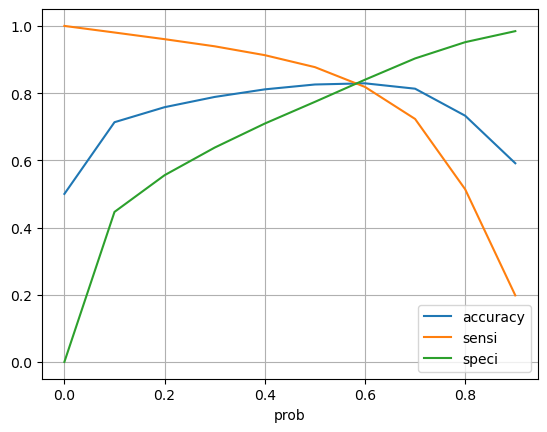

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

* Observation : Analysis of the above curve

- Accuracy - Becomes stable around 0.6
- Sensitivity - Decreases with the increased probablity.
- Specificity - Increases with the increasing probablity.
- At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.
- Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, which is our main goal.

In [151]:
# lets add final predictions into the dataframe
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,converted,conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.024773,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000205,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.638742,2,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.019094,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.135509,4,0,1,1,0,0,0,0,0,0,0,0,0


In [152]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Predicted)
print(confusion)

[[15450  4511]
 [ 2448 17513]]


In [153]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's check the overall accuracy.
print("Accuracy: " , metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Predicted))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))


Accuracy:  0.8256850859175392
Sensitivity: 0.8773608536646461
Specificity: 0.7740093181704324


In [154]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.converted, y_train_pred_final.conversion_prob, 
                                         drop_intermediate=False)

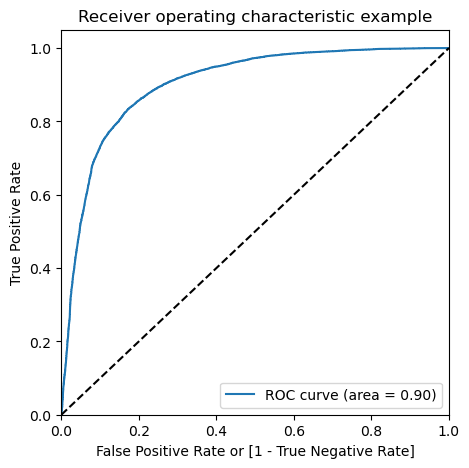

In [156]:
# Calling the ROC function
draw_roc(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

### Making predictions on Test dataset

In [157]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()

# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,aon,sep_vbc_3g,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,vbc_3g_diff
37239,-0.522188,-0.444457,-0.407970,-0.123268,0.225971,0.933392,-0.234418,-0.221689,-0.233400,-0.251859,...,2.339509,-0.114808,0.704106,0.731315,-0.125170,-0.037207,0.599786,0.542207,0.089366,0.044325
44745,0.531122,0.508241,0.332627,-0.035309,-0.221564,-0.243663,-0.234418,-0.221689,-0.233400,-0.251859,...,-0.821561,-0.114808,-0.332138,-0.260889,-0.286856,0.821368,-0.268365,0.160960,-0.350304,0.033814
83220,0.408660,0.065381,0.409749,-0.361046,-0.287977,0.335560,-0.234418,-0.221689,-0.233400,-0.251859,...,0.584126,-0.114808,0.769357,0.598882,1.257734,0.226970,1.215703,0.714873,0.009989,0.917367
24183,-0.350958,-0.539630,-0.458896,-0.547854,-0.637672,-0.515963,-0.234418,-0.221689,-0.230291,-0.251859,...,-0.294716,-0.114808,-0.255847,0.248257,-0.738917,-0.169295,-0.261326,0.052096,0.089366,0.044325
67148,-0.612232,-0.583787,-0.462769,-0.633964,-0.640424,-0.508202,-0.234418,-0.221689,-0.233400,-0.251859,...,-0.676621,-0.114808,0.091794,0.447080,-0.857283,-1.093913,0.137554,0.144011,-0.566674,-0.873604


In [158]:
# Selecting the columns in X_train for X_test as well
X_test = X_test[cols]
X_test.head()

,onnet_mou_7,onnet_mou_8,loc_og_t2t_mou_8,loc_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_8,sep_vbc_3g,total_og_mou_diff,vol_2g_mb_diff,vol_3g_mb_diff
37239,-0.444457,-0.407970,-0.139496,1.787978,-0.464618,-0.354718,-0.013343,0.065651,1.489715,1.551956,2.670337,2.541101,2.945796,-0.345581,-0.277950,-0.246299,-0.114808,0.731315,0.542207,0.089366
44745,0.508241,0.332627,0.081859,0.199272,0.313871,0.380657,-0.013343,0.343936,0.550381,0.411814,2.670337,-0.301156,-0.273885,0.153092,-0.277950,-0.246299,-0.114808,-0.260889,0.160960,-0.350304
83220,0.065381,0.409749,0.062477,0.123895,0.092825,0.478411,-0.013343,0.017318,-0.323472,-0.057178,-0.296853,-0.301156,-0.273885,-0.345581,1.808611,1.874202,-0.114808,0.598882,0.714873,0.009989
24183,-0.539630,-0.458896,-0.256065,-0.331561,-0.464618,-0.354718,-0.013343,0.156655,1.150443,0.624219,2.670337,-0.301156,-0.273885,-0.345581,-0.277950,-0.246299,-0.114808,0.248257,0.052096,0.089366
67148,-0.583787,-0.462769,-0.264930,-0.325906,-0.464287,-0.354718,-0.013343,-0.226676,0.440679,0.459749,-0.296853,-0.301156,-0.273885,1.649109,-0.277950,-0.246299,-0.114808,0.447080,0.144011,-0.566674


In [159]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm

,const,onnet_mou_7,onnet_mou_8,loc_og_t2t_mou_8,loc_og_mou_8,std_og_t2t_mou_7,std_og_t2t_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,...,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_8,sep_vbc_3g,total_og_mou_diff,vol_2g_mb_diff,vol_3g_mb_diff
37239,1.0,-0.444457,-0.407970,-0.139496,1.787978,-0.464618,-0.354718,-0.013343,0.065651,1.489715,...,2.670337,2.541101,2.945796,-0.345581,-0.277950,-0.246299,-0.114808,0.731315,0.542207,0.089366
44745,1.0,0.508241,0.332627,0.081859,0.199272,0.313871,0.380657,-0.013343,0.343936,0.550381,...,2.670337,-0.301156,-0.273885,0.153092,-0.277950,-0.246299,-0.114808,-0.260889,0.160960,-0.350304
83220,1.0,0.065381,0.409749,0.062477,0.123895,0.092825,0.478411,-0.013343,0.017318,-0.323472,...,-0.296853,-0.301156,-0.273885,-0.345581,1.808611,1.874202,-0.114808,0.598882,0.714873,0.009989
24183,1.0,-0.539630,-0.458896,-0.256065,-0.331561,-0.464618,-0.354718,-0.013343,0.156655,1.150443,...,2.670337,-0.301156,-0.273885,-0.345581,-0.277950,-0.246299,-0.114808,0.248257,0.052096,0.089366
67148,1.0,-0.583787,-0.462769,-0.264930,-0.325906,-0.464287,-0.354718,-0.013343,-0.226676,0.440679,...,-0.296853,-0.301156,-0.273885,1.649109,-0.277950,-0.246299,-0.114808,0.447080,0.144011,-0.566674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49770,1.0,0.183415,0.598032,2.059297,2.239875,-0.464080,-0.302847,-0.013343,1.666159,-0.645768,...,-0.296853,-0.301156,-0.273885,-0.345581,-0.277950,-0.246299,-0.114808,0.739503,0.173549,0.089366
28927,1.0,-0.594087,-0.473786,-0.290149,-0.537002,-0.464618,-0.354718,-0.013343,-0.330480,-0.625747,...,-0.296853,-0.301156,-0.273885,-0.345581,1.808611,1.874202,-0.114808,0.446766,0.278726,0.764935
54528,1.0,-0.565989,-0.455432,-0.264600,-0.417450,-0.462033,-0.346531,-0.013343,-0.296111,-0.487716,...,-0.296853,-0.301156,-0.273885,-0.345581,-0.277950,-0.246299,-0.114808,0.248854,0.173549,0.089366
66821,1.0,-0.571303,-0.459016,-0.256340,-0.241814,-0.464618,-0.354718,-0.013343,-0.311550,0.048928,...,2.670337,2.541101,2.945796,-0.345581,-0.277950,-0.246299,-0.114808,0.245886,0.158108,0.206887


In [160]:
# Dropping the required columns from X_test as well

X_test.drop(["og_others_8","onnet_mou_8", "onnet_mou_7", "std_og_t2t_mou_7", "loc_og_t2t_mou_8"], 1, inplace = True)
#X_test.drop(["og_others_8", "onnet_mou_7", "std_ic_mou_8",  "std_ic_t2m_mou_7",  "std_ic_mou_7"], 1, inplace = True)

In [161]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = result.predict(sm.add_constant(X_test))

In [162]:
y_test_pred[:10]

37239    0.000502
44745    0.148877
83220    0.068252
24183    0.259214
67148    0.284529
99043    0.292673
83815    0.083506
45811    0.000002
64422    0.156558
11914    0.685874
dtype: float64

In [163]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
37239,0.000502
44745,0.148877
83220,0.068252
24183,0.259214
67148,0.284529


In [164]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting Customer ID to index
y_test_df['Customer ID'] = y_test_df.index

In [166]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
# Check 'y_pred_final'
y_pred_final.head()

,churn,Customer ID,0
0,0,37239,0.000502
1,0,44745,0.148877
2,0,83220,0.068252
3,0,24183,0.259214
4,0,67148,0.284529


In [169]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'conversion_prob'})
y_pred_final.head()

,churn,Customer ID,conversion_prob
0,0,37239,0.000502
1,0,44745,0.148877
2,0,83220,0.068252
3,0,24183,0.259214
4,0,67148,0.284529


In [170]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Customer ID','churn','conversion_prob'], axis=1)
y_pred_final.head()

,Customer ID,churn,conversion_prob
0,37239,0,0.000502
1,44745,0,0.148877
2,83220,0,0.068252
3,24183,0,0.259214
4,67148,0,0.284529


In [171]:
# Make predictions on the test set using 0.35 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

In [172]:
# Check y_pred_final
y_pred_final.head()

,Customer ID,churn,conversion_prob,final_predicted
0,37239,0,0.000502,0
1,44745,0,0.148877,0
2,83220,0,0.068252,0
3,24183,0,0.259214,0
4,67148,0,0.284529,0


In [173]:
confusion_test = metrics.confusion_matrix(y_pred_final['churn'], y_pred_final.final_predicted )
confusion_test

array([[5162, 1502],
       [  97,  280]], dtype=int64)

In [174]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives


# Let's checking the overall accuracy
print( "Accuracy: ", metrics.accuracy_score(y_pred_final['churn'], y_pred_final.final_predicted))

# Sensitivity
print("Sensitivity:",TP / float(TP+FN))

# Specificity
print("Specificity:", TN / float(TN+FP))

Accuracy:  0.7729015764806135
Sensitivity: 0.7427055702917772
Specificity: 0.774609843937575


#### Performance of Logistic regression without PCA

* Train Dataset
- Accuracy:    0.82
- Sensitivity: 0.87
- Specificity: 0.77
 
 
* Test Dataset
- Accuracy:    0.78
- Sensitivity: 0.75
- Specificity: 0.77   

## Step 10: Identifying important features

In [175]:
# Identifying important features who can predict churn more precisely.
result.params.sort_values(ascending=False)

loc_ic_t2m_mou_7     0.770307
std_og_t2t_mou_8    -0.199342
vol_2g_mb_diff      -0.395713
monthly_3g_6        -0.397614
vol_3g_mb_diff      -0.416280
monthly_2g_7        -0.505933
monthly_2g_6        -0.532925
loc_ic_t2t_mou_8    -0.550311
monthly_3g_8        -0.600942
total_og_mou_diff   -0.613610
const               -0.682939
loc_og_mou_8        -0.683612
monthly_2g_8        -0.684039
sachet_2g_8         -0.729509
loc_ic_t2m_mou_8    -1.378562
sep_vbc_3g          -1.558633
dtype: float64

## Step 11: Recommend strategies to manage customer churn

* The company should focus on below customers to find churners,
    - The churn rate is more for the customers, whose average revenue decreased in the action phase than the good phase so company should focus on those customers.
    - we can see that churn rate is much more for the customers whose outgoing minutes and incoming call minutes are reduced in action phase.
    - customers who have not rechared for more number of times has higher chances of churning.
    - As number of recharges are decreasing, recharge amount is also decreasing in action phase for churned customers.
    - 2g and 3g data usage is not making any significant difference between churners and non churners. 
    - Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.
    - cutomers with tenure less than 4 yrs are more likely to churn. Average age on network of churners is low.

* Based on the above indicators the recommendations to the telecom company are :
    Models with high sensitivity are the best for predicting churn. Use the PCA + Logistic Regression model to predict churn. It has sensitivity of 87.2 %